In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DDims_NewLongerDriftEvalExp_MSEs_10240NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+" Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+" Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257, :]
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+" Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+" Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257, :]
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+" Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+" Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]
score_drifts = np.load(root_dir + extra_path+ "_8_score_drifts.npy", allow_pickle=True).reshape((1000, 1281, 8), order="C")[:, :257, :]/256
nad_drifts = np.load(root_dir + extra_path+ "_8_nad_drifts.npy", allow_pickle=True).reshape((1000, 1281, 8), order="C")[:, :257, :]/256
true_drifts = np.load(root_dir + extra_path+ "_8_true_drifts.npy", allow_pickle=True).reshape((1000, 1281, 8), order="C")[:, :257, :]/256

score_paths = np.load(root_dir + extra_path+ "_8_score_paths.npy", allow_pickle=True).reshape((1000, 1281, 8), order="C")[:, :257, :]
nad_paths = np.load(root_dir + extra_path+ "_8_nad_paths.npy", allow_pickle=True).reshape((1000, 1281, 8), order="C")[:, :257, :]
true_paths = np.load(root_dir + extra_path+ "_8_true_paths.npy", allow_pickle=True).reshape((1000, 1281, 8), order="C")[:, :257, :]

score_diffs = true_paths-nad_paths
idxs = np.argsort(np.sum(np.abs(score_diffs), axis=-1)[:, -1], axis=0).flatten()

true_drifts = true_drifts[idxs, :,:][::-1, :,:]/256
score_drifts = score_drifts[idxs, :,:][::-1,:,:]/256
nad_drifts = nad_drifts[idxs, :,:][::-1,:,:]/256

true_paths = true_paths[idxs, :,:][::-1, :,:]
score_paths = score_paths[idxs, :,:][::-1, :,:]
nad_paths = nad_paths[idxs, :,:][::-1, :,:]


In [84]:
time_ax = np.linspace(0, 1/256*(stable_true_law_eval.shape[0]-1),stable_true_law_eval.shape[0])

In [85]:
true_law_eval = stable_true_law_eval.sort_index(axis=1).set_index(time_ax)

In [86]:
alt_law_eval = stable_alt_law_eval.sort_index(axis=1).set_index(time_ax)

In [87]:
state_eval = stable_state_eval.sort_index(axis=1).set_index(time_ax)

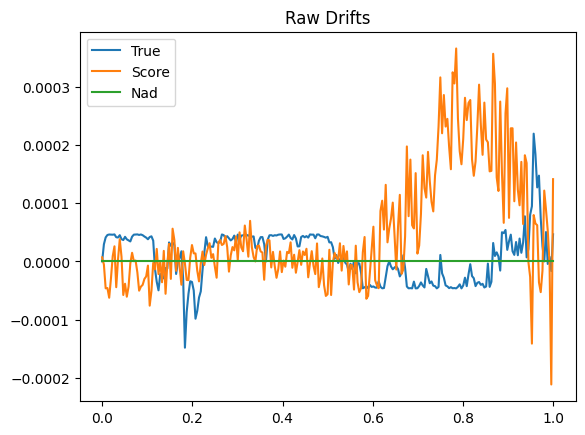

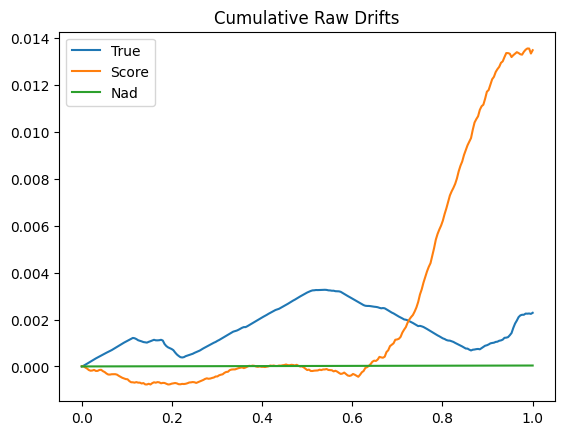

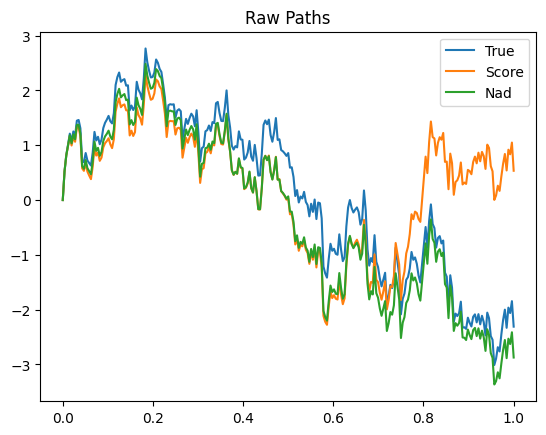

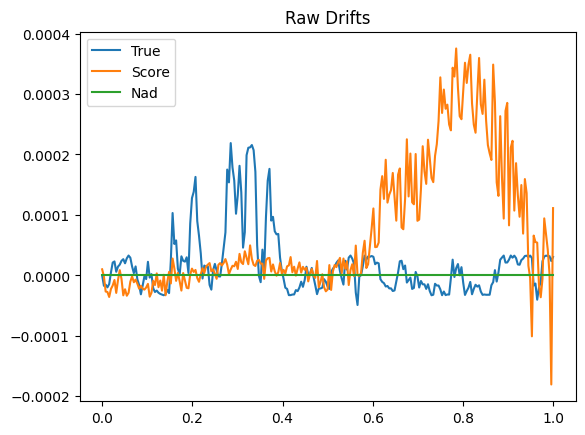

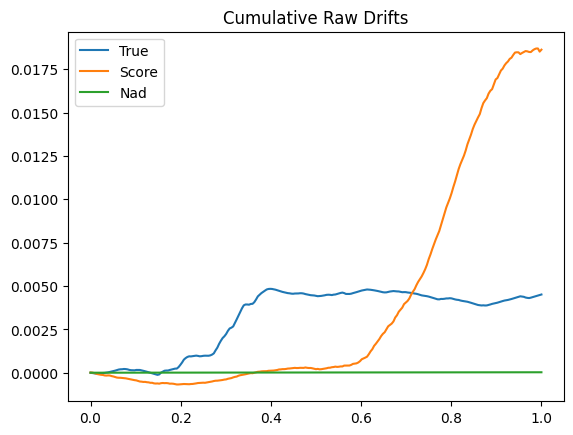

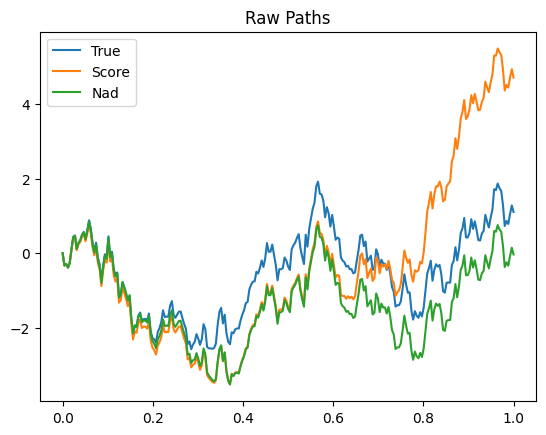

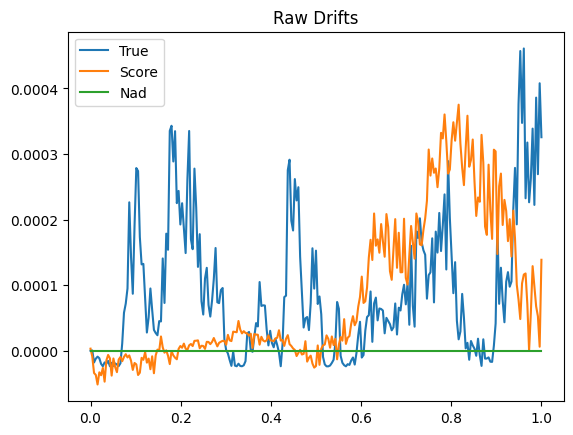

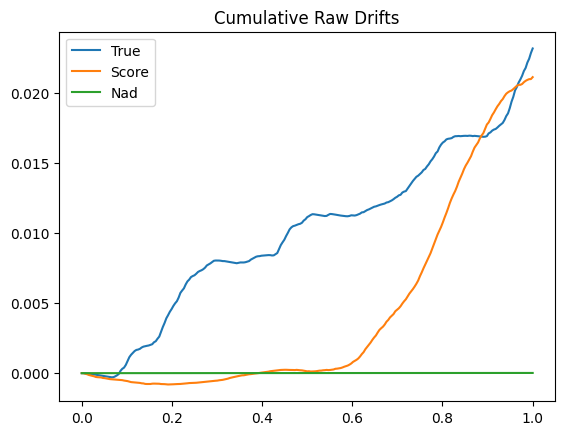

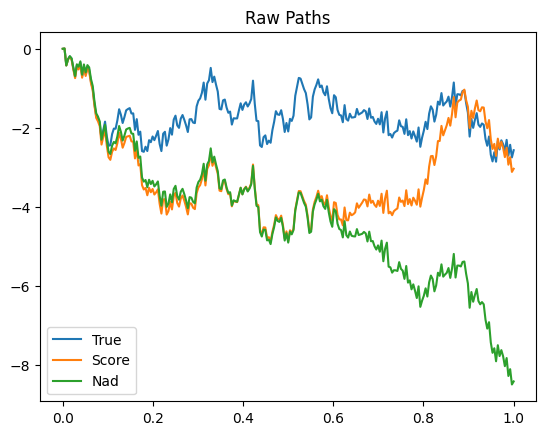

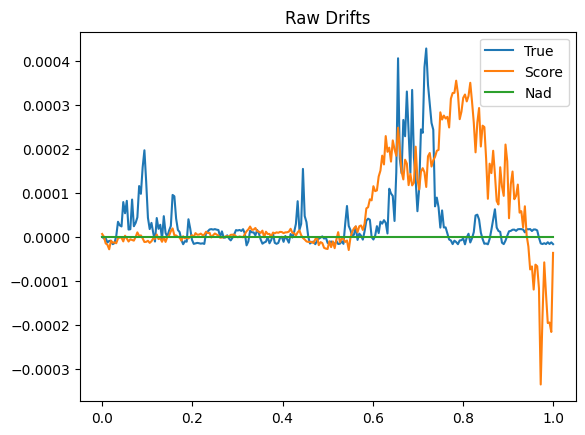

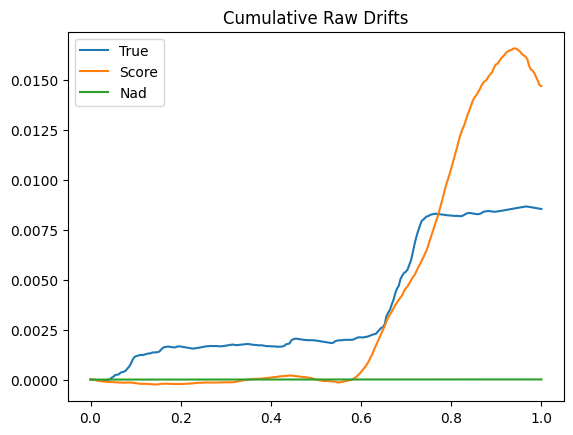

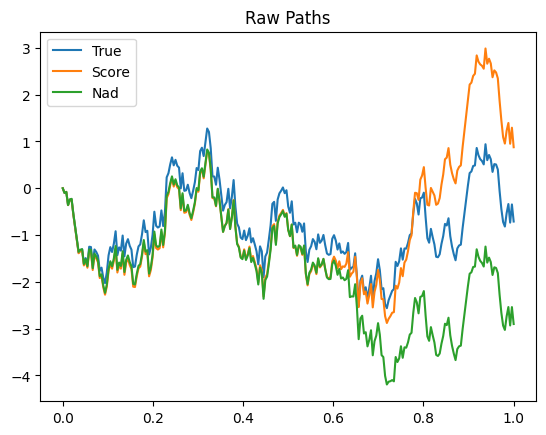

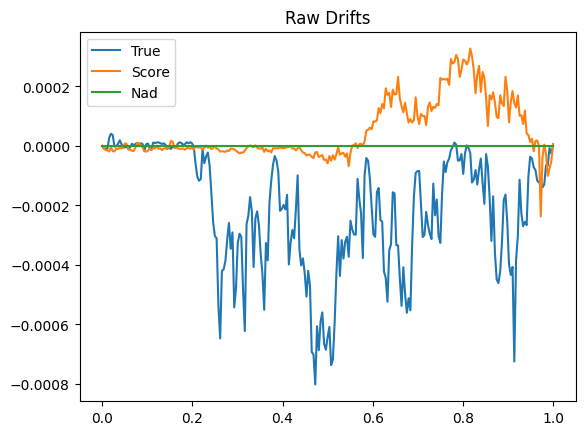

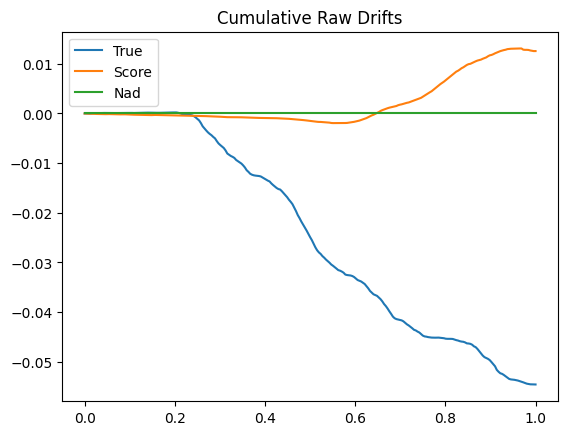

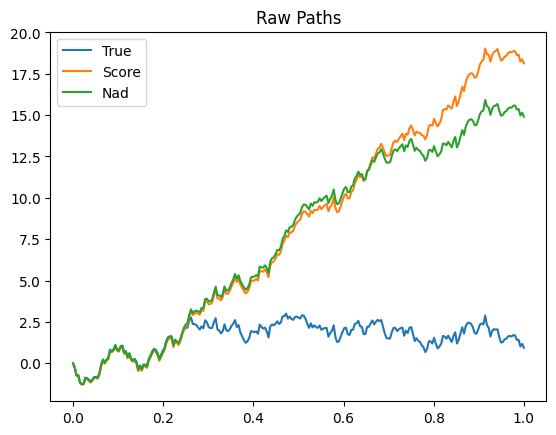

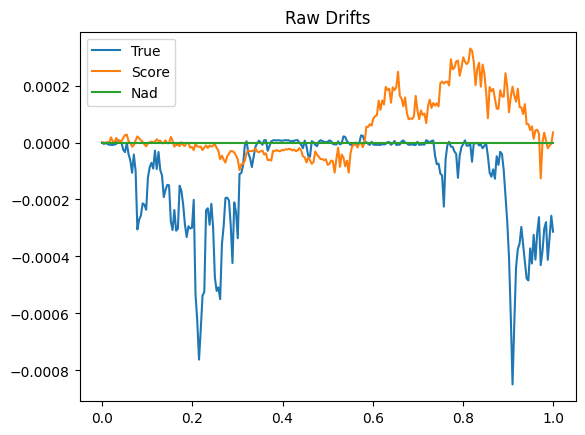

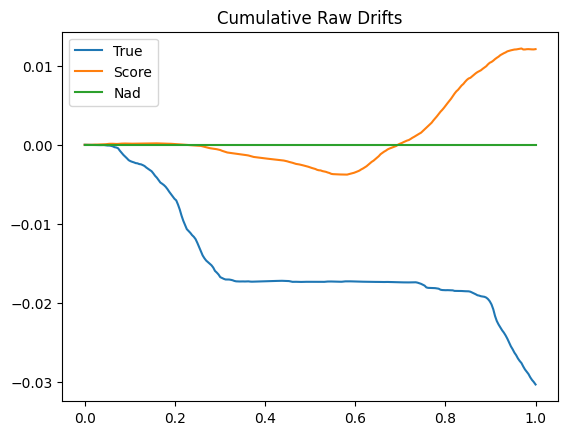

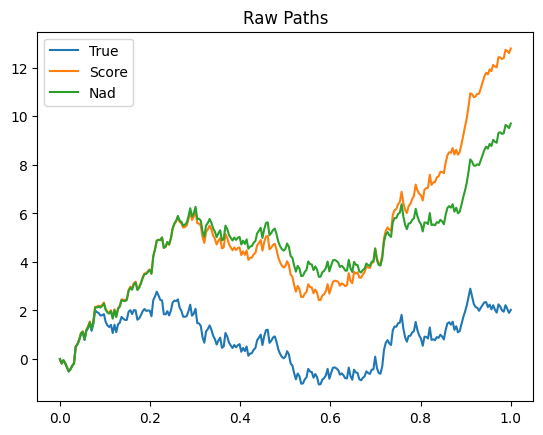

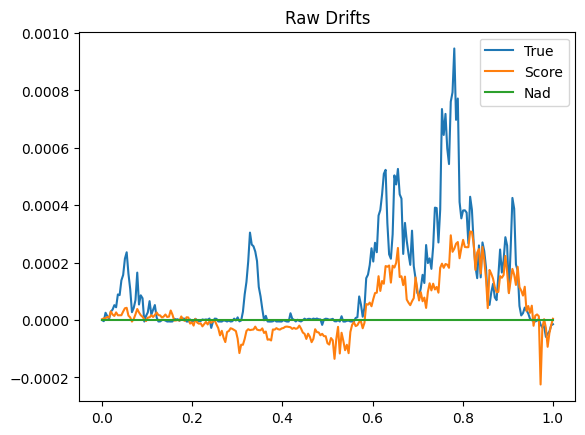

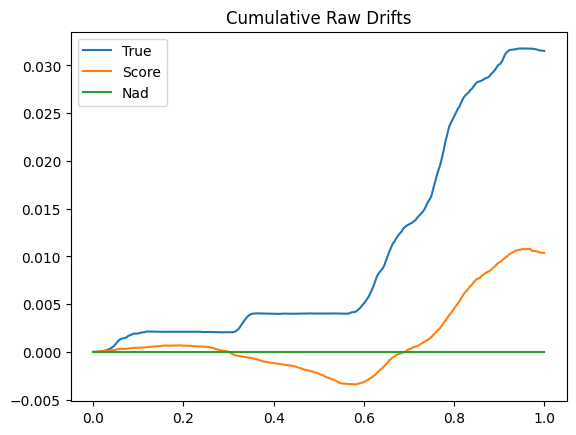

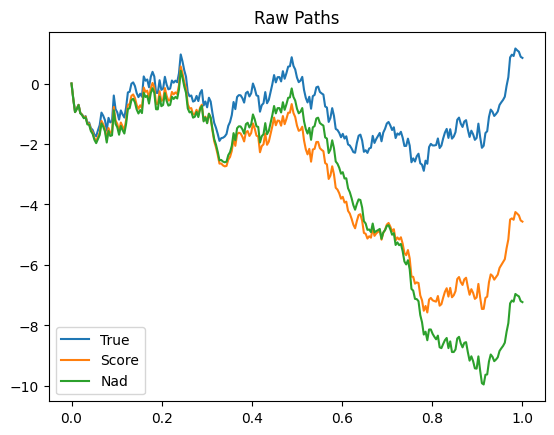

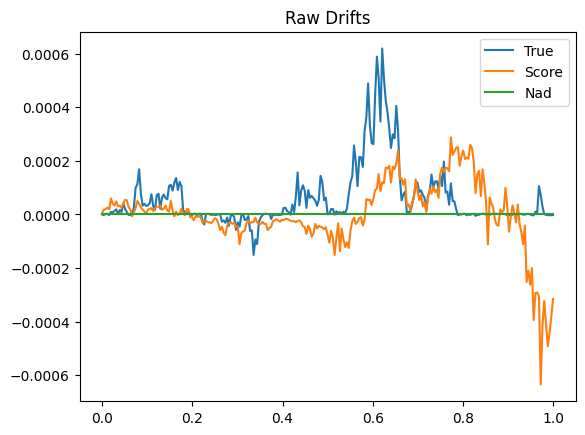

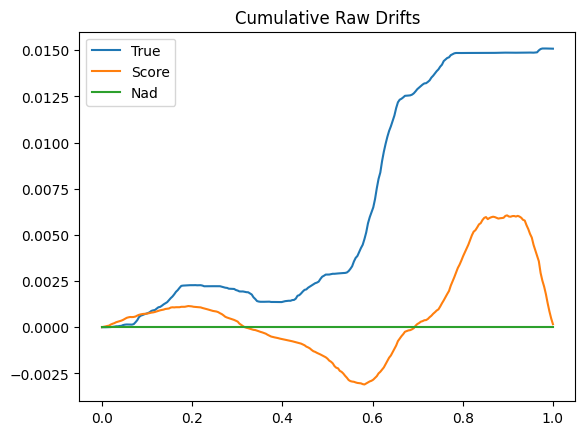

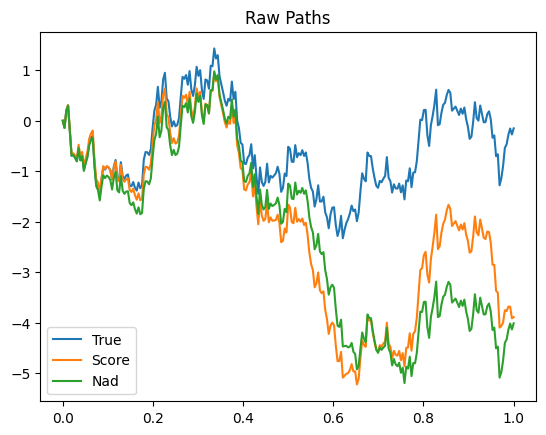

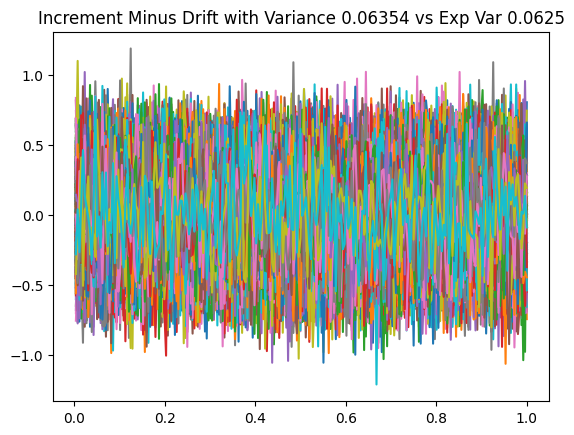

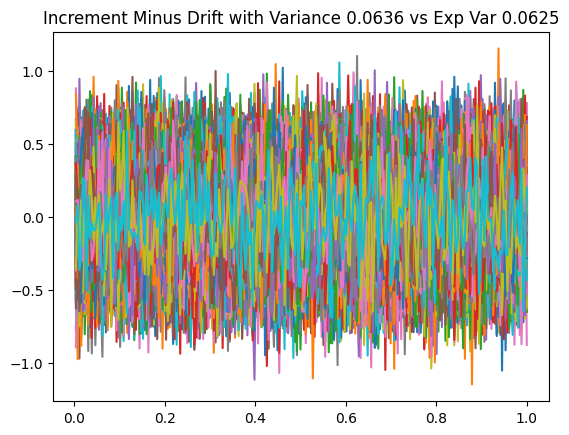

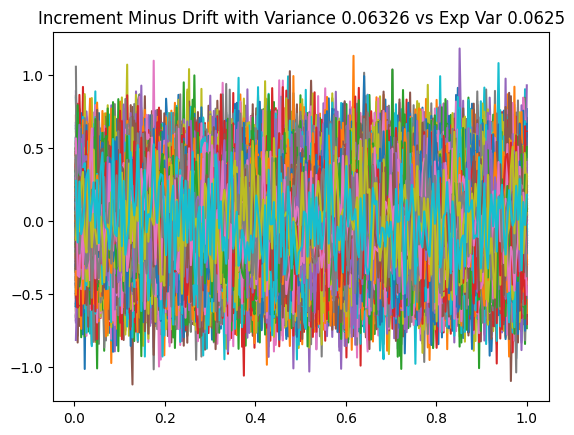

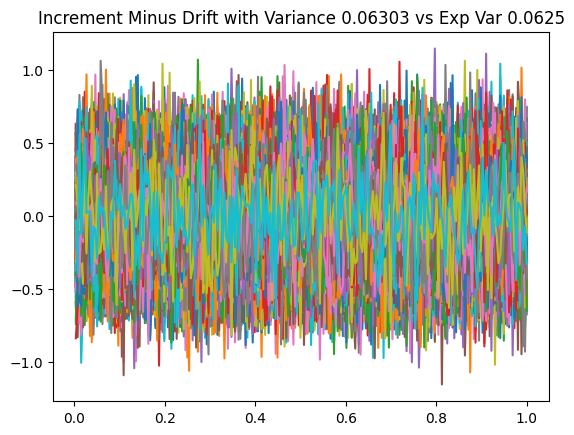

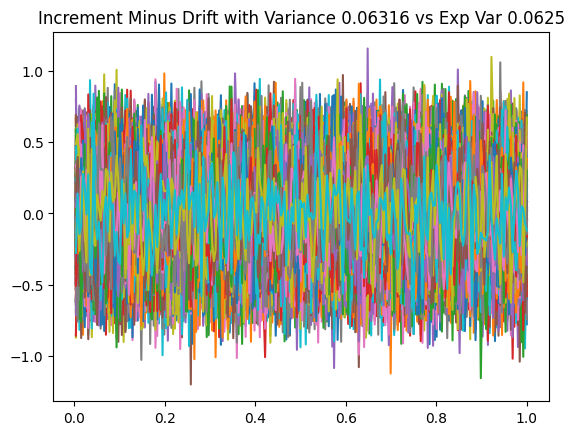

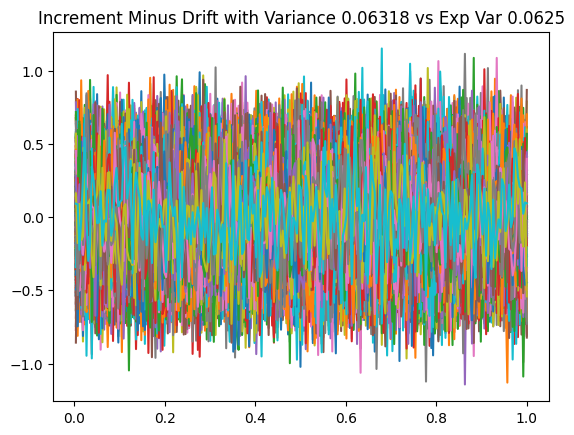

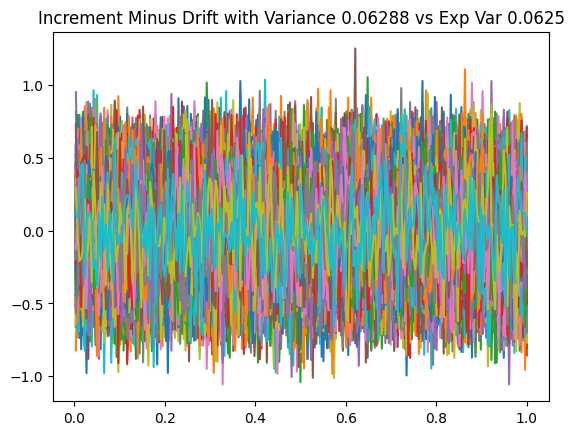

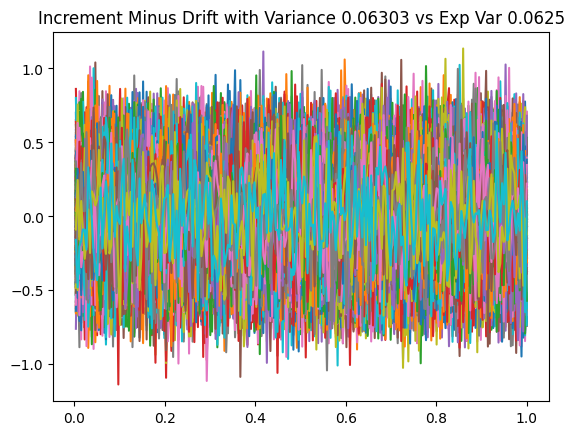

In [88]:
for k in range(1):
    for d in range(8):
        plt.plot(time_ax, true_drifts[k, :, d], label="True")
        plt.plot(time_ax, score_drifts[k, :, d], label="Score")
        plt.plot(time_ax, nad_drifts[k, :, d], label="Nad")
        plt.legend()
        plt.title("Raw Drifts")
        plt.show()
        plt.close()

        plt.plot(time_ax, np.cumsum(true_drifts[k, :, d]), label="True")
        plt.plot(time_ax, np.cumsum(score_drifts[k, :, d]), label="Score")
        plt.plot(time_ax, np.cumsum(nad_drifts[k, :, d]), label="Nad")
        plt.legend()
        plt.title("Cumulative Raw Drifts")
        plt.show()
        plt.close()

        plt.plot(time_ax, true_paths[k, :, d], label="True")
        plt.plot(time_ax, score_paths[k, :, d], label="Score")
        plt.plot(time_ax, nad_paths[k, :, d], label="Nad")
        plt.legend()
        plt.title("Raw Paths")
        plt.show()
        plt.close()

for d in range(8):
    for k in range(0, 1000):
        plt.plot(time_ax[1:], np.diff(score_paths[k, :, d]) - (score_drifts[k, 1:, d]), label="Score Difference")
    plt.title(f"Increment Minus Drift with Variance {round(np.var(np.diff(score_paths[:, :, d],axis=1)-(score_drifts[:, 1:, d])),5)} vs Exp Var {round(16/256, 5)}")
    plt.show()
    plt.close()